#### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#### Load the dataset

In [2]:
data_path = "../data/raw/boston.csv"
data = pd.read_csv(data_path)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Summarize statistics to get insights about the data

In [3]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


#### Visualize correlation between variables

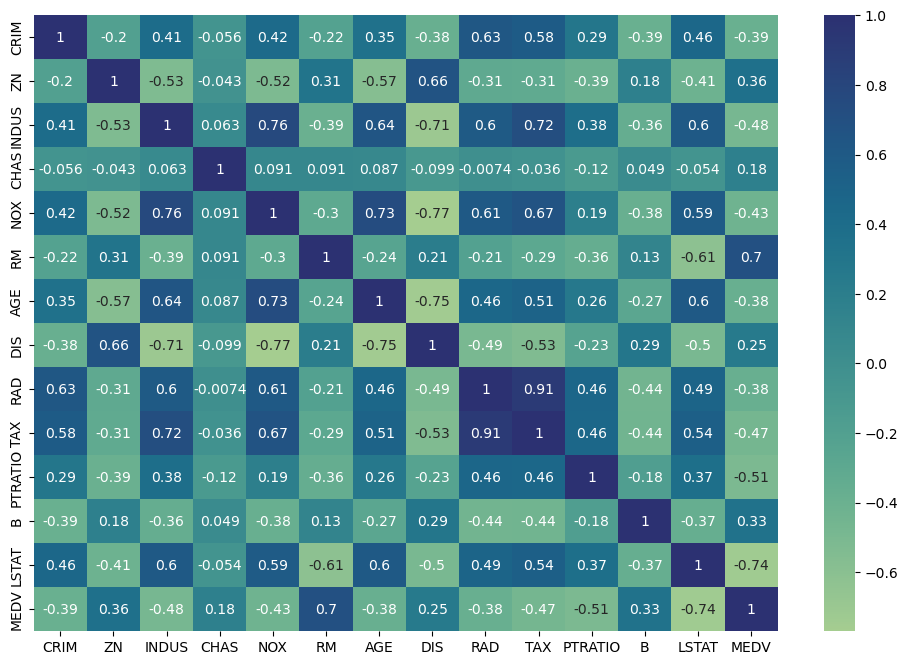

In [4]:
plt.figure(figsize=(12, 8))
# correlation matrix
sns.heatmap(data.corr(), annot=True, cmap="crest")
plt.show()

#### Prepare test and training set

In [5]:
from sklearn.model_selection import train_test_split

X = data.drop(columns = ["MEDV"])
y = data["MEDV"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.728542,11.632426,11.130470,0.074257,0.553150,6.275735,69.235149,3.830108,9.529703,409.829208,18.501485,355.974406,12.804802
std,9.123026,23.559000,6.943018,0.262514,0.115347,0.698889,28.195032,2.190440,8.701365,168.586852,2.134881,92.439926,7.353883
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.863000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082382,0.000000,5.130000,0.000000,0.448000,5.879000,45.800000,2.102875,4.000000,283.250000,17.400000,374.710000,6.767500
50%,0.234195,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.107300,5.000000,330.000000,19.100000,391.465000,11.490000
75%,3.681942,18.500000,18.100000,0.000000,0.624000,6.618250,94.325000,5.212575,24.000000,666.000000,20.200000,396.285000,17.195000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


#### Remove outliers

In [6]:
# remove outliers
training_set = pd.concat([X_train, y_train], axis=1)

features = training_set.columns.tolist()
for feature in features:
    if feature not in ["RAD", "CHAS","MEDV"]:
        q1 = training_set[feature].quantile(0.25)
        q3 = training_set[feature].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 3 * iqr
        upper = q3 + 3 * iqr
        training_set = training_set[(training_set[feature] >= lower) & (training_set[feature] <= upper)]
training_set.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000,329.000000
mean,1.467583,11.510638,10.201884,0.085106,0.534436,6.310143,65.896657,4.070730,7.732523,377.136778,18.351368,386.275015,11.417295,23.686930
std,2.835609,21.473552,6.806963,0.279465,0.105936,0.631190,28.061165,2.128628,7.456472,151.450073,2.109952,15.915047,6.237119,8.427147
min,0.006320,0.000000,1.250000,0.000000,0.385000,4.880000,2.900000,1.129600,1.000000,188.000000,12.600000,318.010000,1.730000,6.300000
25%,0.072440,0.000000,4.930000,0.000000,0.445000,5.914000,42.400000,2.368200,4.000000,277.000000,16.900000,383.730000,6.580000,18.700000
50%,0.171340,0.000000,8.140000,0.000000,0.515000,6.211000,70.400000,3.495200,5.000000,307.000000,18.600000,392.800000,10.160000,22.000000
75%,0.785700,20.000000,18.100000,0.000000,0.605000,6.618000,92.200000,5.415900,7.000000,430.000000,20.200000,396.900000,14.700000,26.600000
max,14.333700,80.000000,27.740000,1.000000,0.871000,8.398000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,34.770000,50.000000


#### Apply normalization to applicable features

In [7]:
# normalize
from sklearn.preprocessing import MinMaxScaler

X_train = training_set.drop(columns = ["MEDV"])
y_train = training_set["MEDV"]

scaler = MinMaxScaler()
normalizable_features = [col for col in X_train.columns.tolist() if col not in ["RAD", "CHAS"]]
X_train[normalizable_features] = scaler.fit_transform(X_train[normalizable_features])
X_test[normalizable_features] = scaler.transform(X_test[normalizable_features])

X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
266,0.054398,0.25,0.102680,0,0.539095,0.606595,0.841401,0.104721,5,0.145315,0.042553,0.837368,0.395278
501,0.003930,0.00,0.403171,0,0.386831,0.486924,0.681771,0.140804,1,0.162524,0.893617,0.937761,0.240315
297,0.009402,0.00,0.478294,0,0.106996,0.258670,0.567456,0.541756,4,0.193117,0.361702,1.000000,0.427058
388,1.000000,0.00,0.636089,0,0.648148,0.000000,1.000000,0.048003,24,0.913958,0.808511,0.696032,0.874395
323,0.019375,0.00,0.231408,0,0.222222,0.235361,0.735324,0.374868,5,0.189293,0.744681,0.926860,0.302966


In [8]:
training_data_path = "../data/processed/training_boston.csv"
test_data_path = "../data/processed/test_boston.csv"

training_set = pd.concat([X_train, y_train], axis=1)
test_set = pd.concat([X_test, y_test], axis=1)

training_set.to_csv(training_data_path, index=False)
test_set.to_csv(test_data_path, index=False)

training_set

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
266,0.054398,0.2500,0.102680,0,0.539095,0.606595,0.841401,0.104721,5,0.145315,0.042553,0.837368,0.395278,30.7
501,0.003930,0.0000,0.403171,0,0.386831,0.486924,0.681771,0.140804,1,0.162524,0.893617,0.937761,0.240315,22.4
297,0.009402,0.0000,0.478294,0,0.106996,0.258670,0.567456,0.541756,4,0.193117,0.361702,1.000000,0.427058,20.3
388,1.000000,0.0000,0.636089,0,0.648148,0.000000,1.000000,0.048003,24,0.913958,0.808511,0.696032,0.874395,10.2
323,0.019375,0.0000,0.231408,0,0.222222,0.235361,0.735324,0.374868,5,0.189293,0.744681,0.926860,0.302966,18.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0.023294,0.0000,0.779162,0,0.491770,0.448550,0.988671,0.103218,4,0.476099,0.914894,0.976423,0.328995,19.2
241,0.006966,0.3750,0.138920,0,0.088477,0.345367,0.640577,0.543436,6,0.214149,0.425532,0.971099,0.322942,20.1
253,0.025310,0.2750,0.174028,0,0.094650,0.960489,0.056643,0.811747,7,0.271511,0.691489,1.000000,0.054782,42.8
390,0.485492,0.0000,0.636089,0,0.648148,0.236782,0.969104,0.083178,24,0.913958,0.808511,0.968691,0.465496,15.1
